In [1]:
from google.colab import files
uploaded = files.upload()
#select the kaggle.json file that is downloaded

Saving kaggle.json to kaggle.json


In [38]:
#below is the method to read data directly from kaggle. Alternatively you can download data and unzip into your local machine.
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c home-data-for-ml-course

mkdir: cannot create directory ‘/root/.kaggle’: File exists
train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
train.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.gz: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
housing_df = pd.read_csv('/content/train.csv', index_col='Id')

# Summary

In [6]:
housing_df.shape

(1460, 80)

In [7]:
housing_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [9]:
numerical_cols = [col for col in housing_df.columns if housing_df[col].dtype in ['int64', 'float64']]
print('number of numerical columns: ' , len(numerical_cols))

number of numerical columns:  37


In [10]:
object_cols = [col for col in housing_df.columns if housing_df[col].dtype == "object"]
print('number of categorical columns: ' , len(object_cols))

number of categorical columns:  43


# Numerical Features

In [11]:
import math
table_length = 8
for i in range(math.ceil(len(numerical_cols)/table_length)):
    cols = numerical_cols[table_length * i: table_length * (i+1)]
    display(housing_df[cols].describe())
    print('\n')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000


,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699
std,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383
min,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000
25%,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000
50%,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000
75%,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000
max,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000


,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014
std,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000
75%,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000
max,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000


,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch
count,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959
std,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415
min,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000
75%,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000
max,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000


,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,40.177307,496.123024,2.703626,1.328095,79442.502883
min,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Together with the feature description provided under <data_description.txt>, we can see which are the continuous numerical features, and which are likely to be discrete numerical ones.

Discrete ones are likely to be Year*, OverallQual, BsmtFullBath, BsmtHalfBath, FullBath etc.

Continuous ones are obvious - those that measure size, space, area etc.

In [12]:
numerical_cols_discrete = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

numerical_cols_continuous = []
for i in numerical_cols:
    if i not in numerical_cols_discrete:
        numerical_cols_continuous.append(i)

print('num of discrete num features: ' , len(numerical_cols_discrete))
print('num of cont num features: ' , len(numerical_cols_continuous))

num of discrete num features:  13
num of cont num features:  24


## Continuous Features

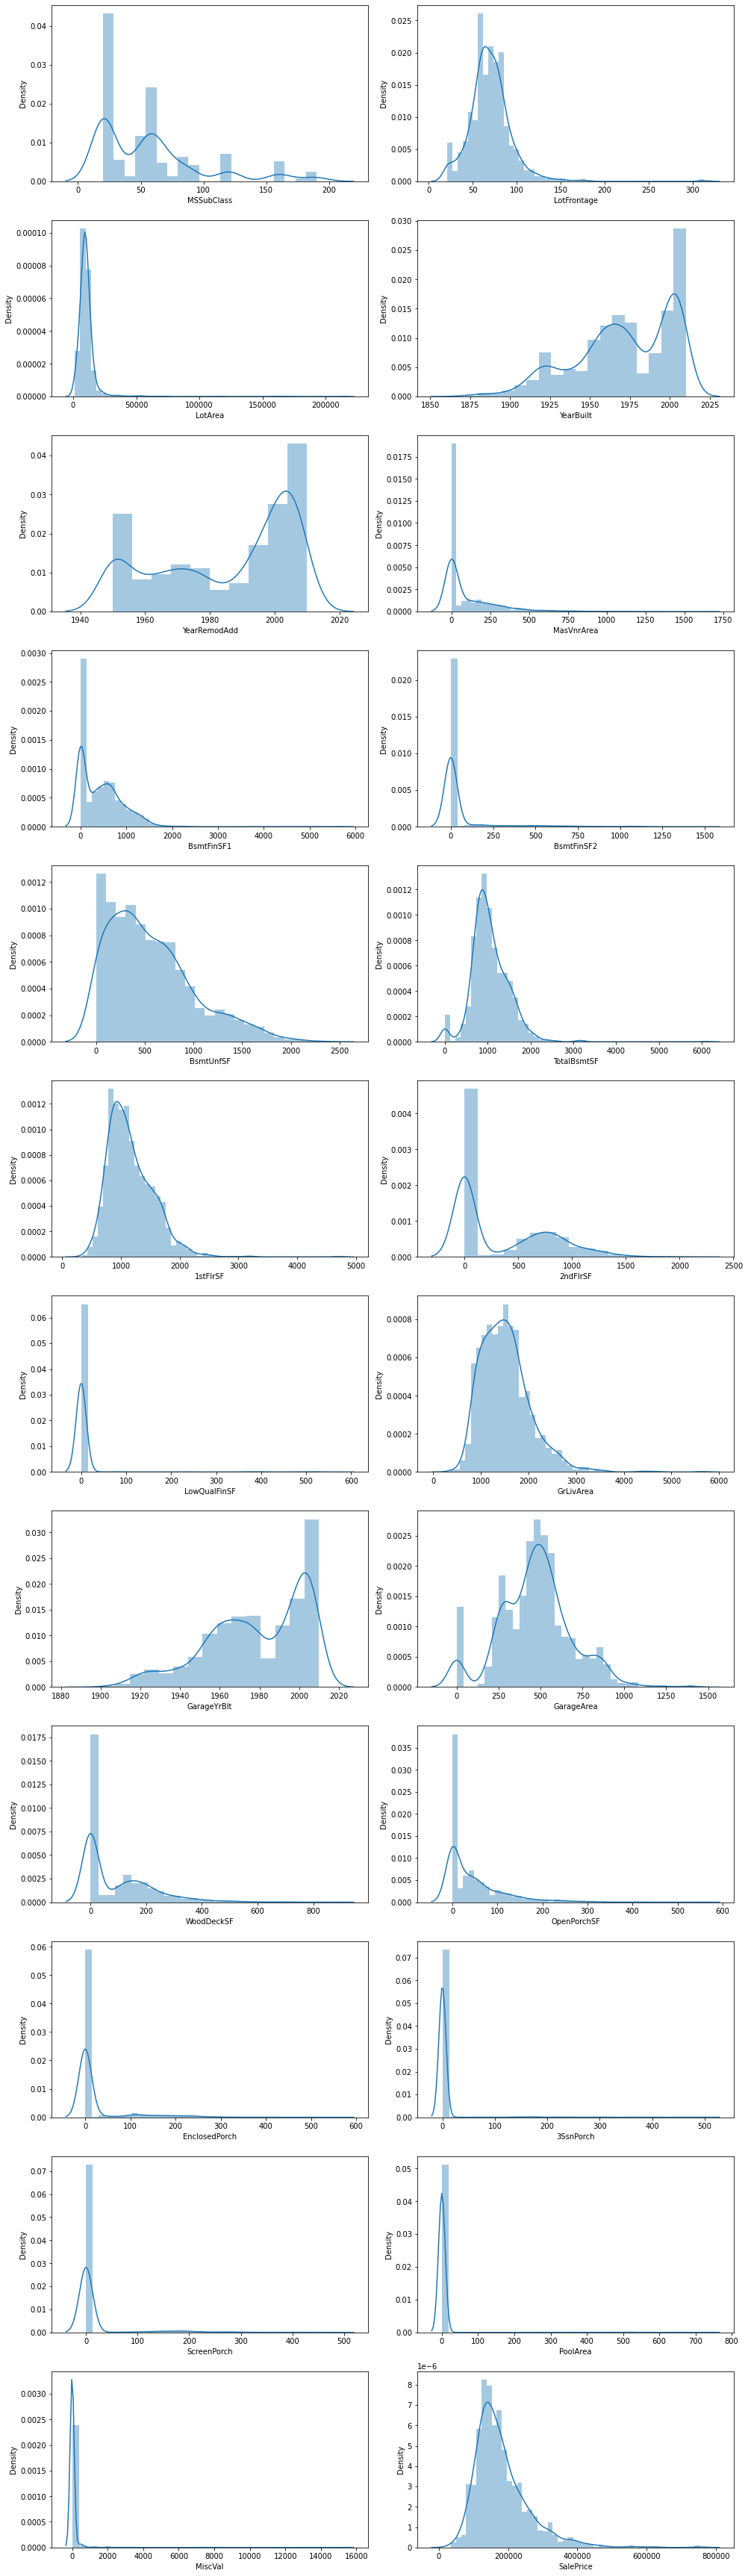

In [13]:
cols = 2
rows = math.ceil(len(numerical_cols_continuous)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))

for i, col in enumerate(numerical_cols_continuous):
    ax = axes[i//cols, i%cols]
    sns.distplot(housing_df[col], kde=True, ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1)
plt.show()

Below are the cont features that have dominating values. We might want to remove them later. 

1. BsmtFinSF2
2. LowQualFinSF
3. EnclosedPorch
4. 3SsnPorch
5. ScreenPorch
6. PoolArea
7. MiscVal

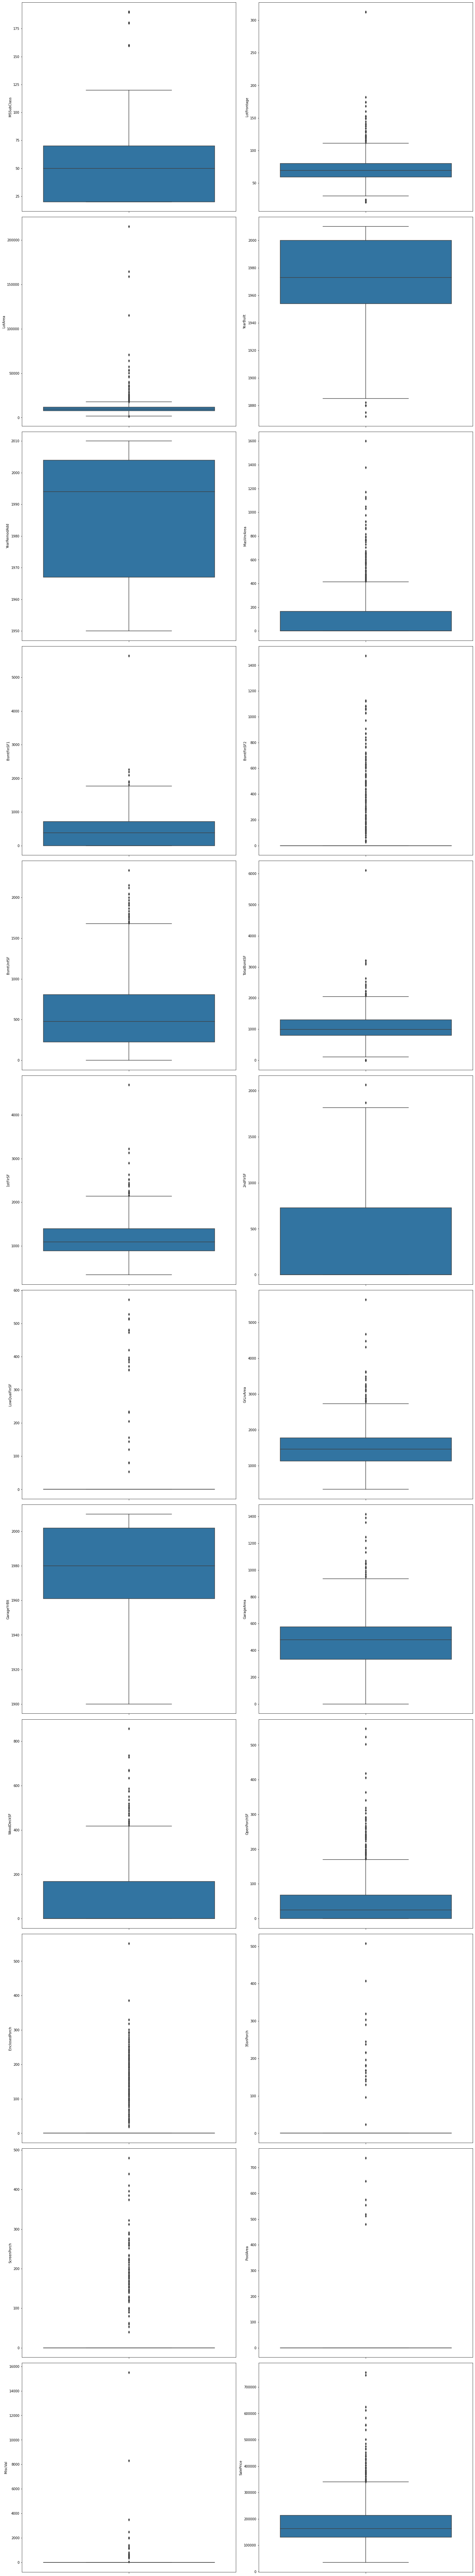

In [14]:
cols = 2
rows = math.ceil(len(numerical_cols_continuous)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(20,18//cols*rows))

for i, col in enumerate(numerical_cols_continuous):
    ax = axes[i//cols, i%cols]
    sns.boxplot(y=col, data=housing_df, ax=ax)

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.show()

Few cont features above have outliets. 

1. msubclass have some > 150
2. lotfrontage have some > 300
3. bsmtfinSF1 have some > 5000
4. totalbsmtsf have some > 6000
5. 1stflrSF some > 4000
6. lotarea some > 200000
7. enclosedporch > 500

## Discrete Features

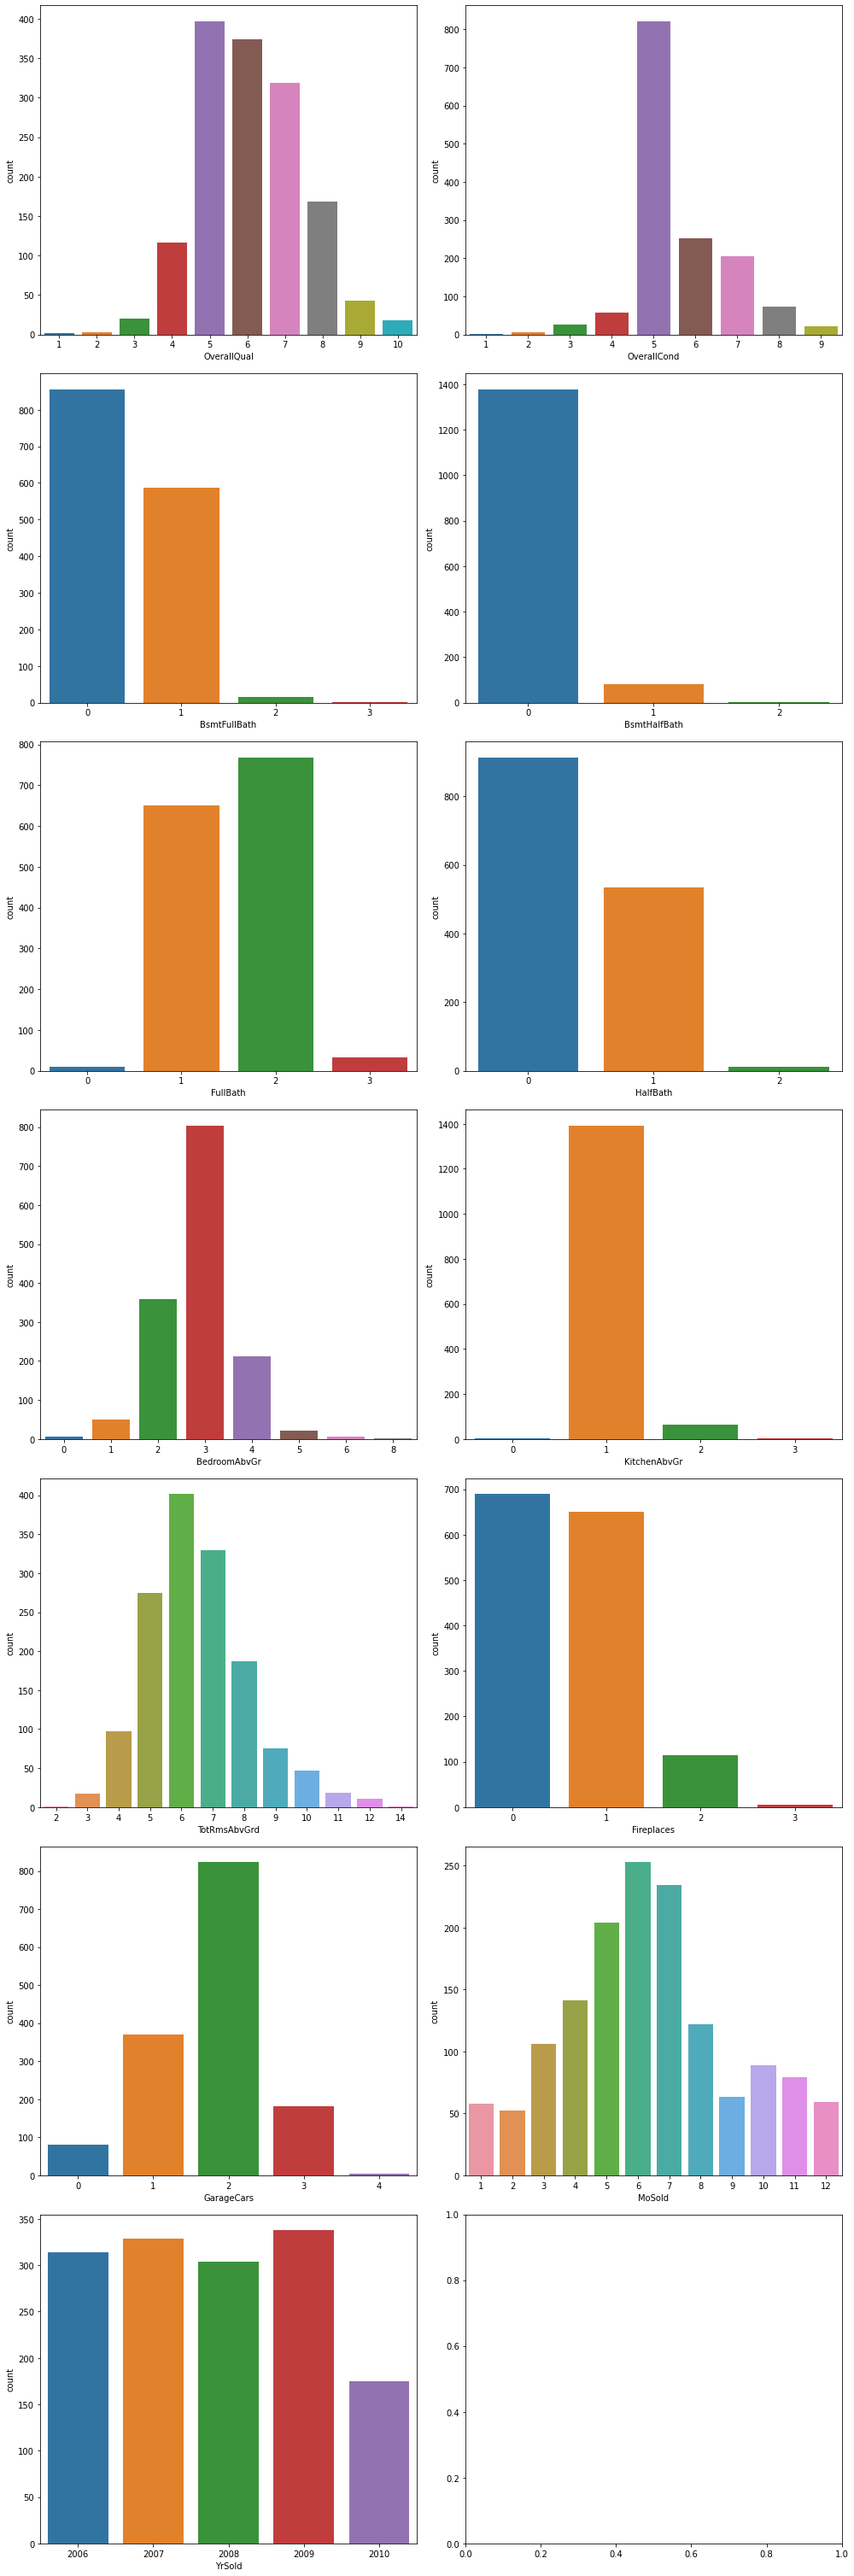

In [15]:
cols = 2
rows = math.ceil(len(numerical_cols_discrete)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 12//cols*rows))

for i, col in enumerate(numerical_cols_discrete):
    ax = axes[i//cols, i%cols]
    sns.countplot(housing_df[col], data=housing_df, ax=ax)

plt.tight_layout()
plt.show()

In [16]:
housing_df['BsmtHalfBath'].value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [17]:
housing_df['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

From above, these are the discrete features that have overly dominating values. 
1. bsmthalfbath - Dominated by 0


2. kitchenabvGr - Dominated by 1

# Categorical Features

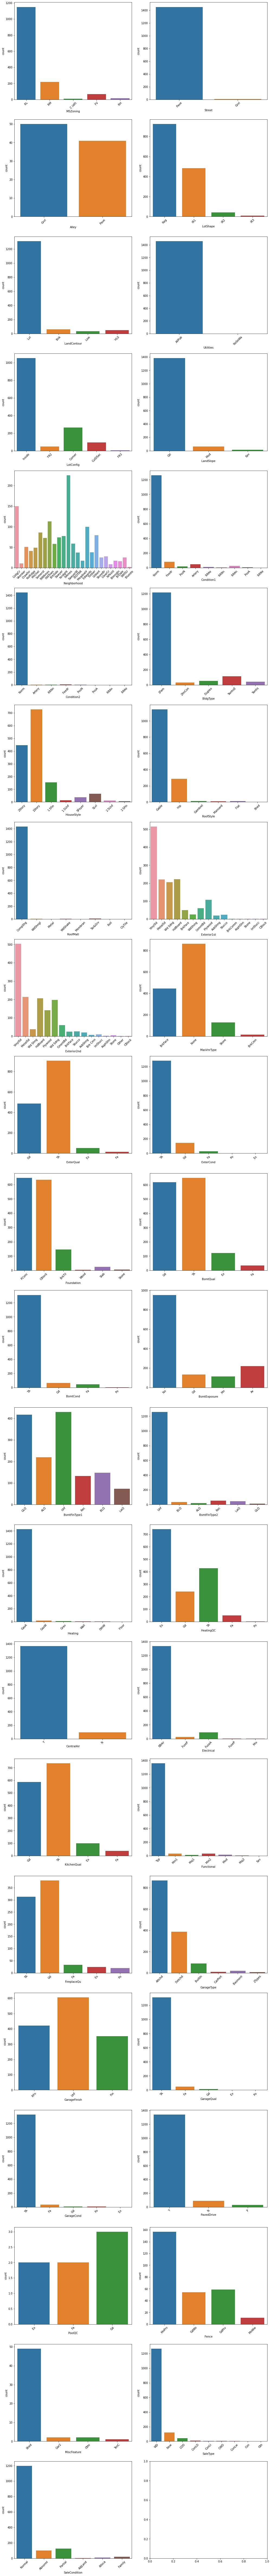

In [18]:
cols = 2
rows = math.ceil(len(object_cols)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 12//cols*rows))

for i, col in enumerate(object_cols):
    ax = axes[i//cols, i%cols]
    sns.countplot(housing_df[col], data=housing_df, ax=ax)
    ax.tick_params('x',labelrotation=45)

plt.tight_layout()
plt.show()

From above, these are the cat features with dominating single values

1. street
2. utilities
3. condition2
4. RoofMatl
5. heating
6. functional
7. GarageQual
8. GarageCond

Below - we can get a quick sensing how these categorical features interact with SalePrice

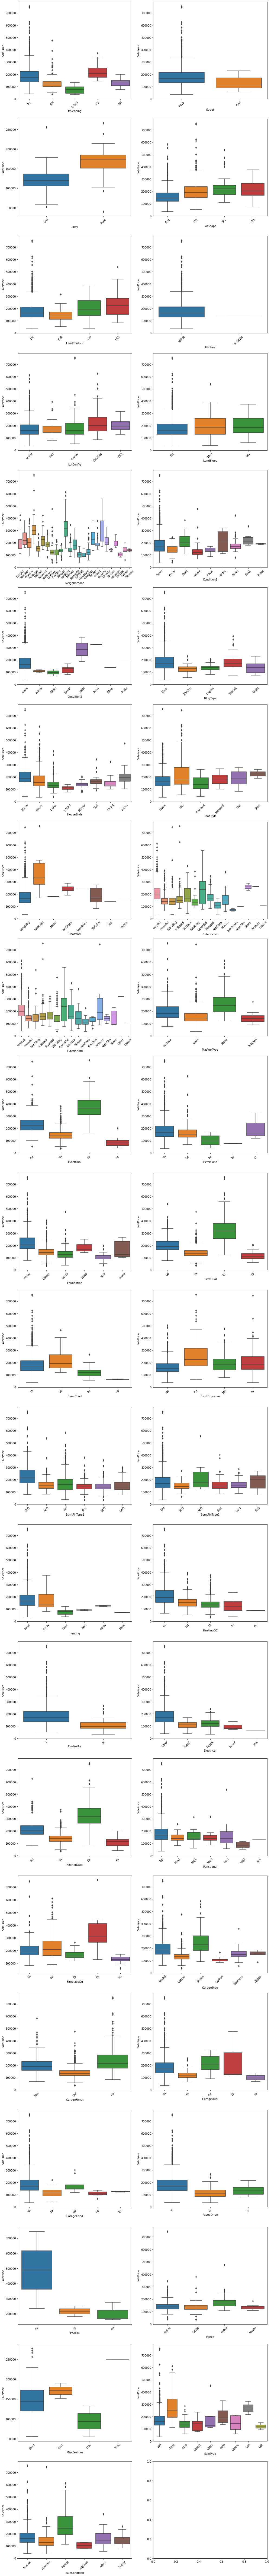

In [19]:
cols = 2
rows = math.ceil(len(object_cols)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 12//cols*rows))

for i, col in enumerate(object_cols):
    ax = axes[i//cols, i%cols]
    sns.boxplot(x = housing_df[col], y = housing_df['SalePrice'], data=housing_df, ax=ax)
    ax.tick_params('x',labelrotation=45)

plt.tight_layout()
plt.show()

Below is a good view to see cardinality of each categorical features (via unqiue)

In [20]:
table_length = 8
for i in range(math.ceil(len(object_cols)/table_length)):
    cols = object_cols[table_length * i: table_length * (i+1)]
    display(housing_df[cols].describe())
    print('\n')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope
count,1460,1460,91,1460,1460,1460,1460,1460
unique,5,2,2,4,4,2,5,3
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl
freq,1151,1454,50,925,1311,1459,1052,1382


,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st
count,1460,1460,1460,1460,1460,1460,1460,1460
unique,25,9,8,5,8,6,8,15
top,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd
freq,225,1260,1445,1220,726,1141,1434,515


,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure
count,1460,1452,1460,1460,1460,1423,1423,1422
unique,16,4,4,5,6,4,4,4
top,VinylSd,None,TA,TA,PConc,TA,TA,No
freq,504,864,906,1282,647,649,1311,953


,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional
count,1423,1422,1460,1460,1460,1459,1460,1460
unique,6,6,6,5,2,5,4,7
top,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ
freq,430,1256,1428,741,1365,1334,735,1360


,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence
count,770,1379,1379,1379,1379,1460,7,281
unique,5,6,3,5,5,3,3,4
top,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv
freq,380,870,605,1311,1326,1340,3,157


,MiscFeature,SaleType,SaleCondition
count,54,1460,1460
unique,4,9,6
top,Shed,WD,Normal
freq,49,1267,1198


Below, we zoom into features with less than 10 cardinalities

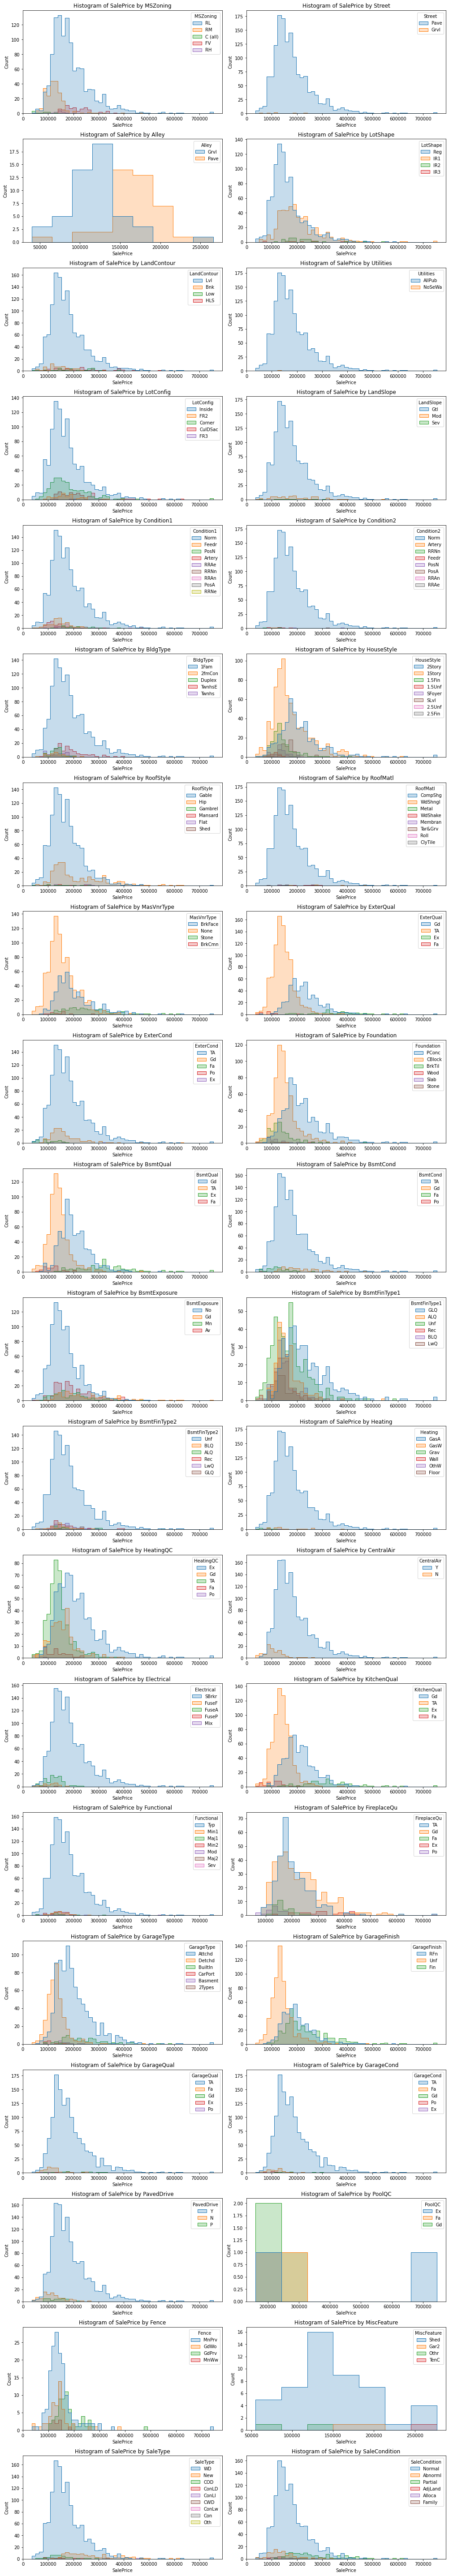

In [21]:
threshold = 10
cardinality = housing_df[object_cols].nunique()
condition = cardinality < threshold
low_cardinality_cat_col = list(cardinality[condition].index)

cols = 2
rows = math.ceil(len(low_cardinality_cat_col)/cols)
fig, axes = plt.subplots(rows, cols, figsize=(14, 8//cols*rows))

for i, col in enumerate(low_cardinality_cat_col):
    ax = axes[i//cols, i%cols]
    sns.histplot(data=housing_df, x='SalePrice', hue=col, element='step', ax=ax)
    ax.set_title(f'Histogram of SalePrice by {col}')

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)
plt.show()

Quick observations from above few categorical feature analysis

1. PoolQC - Excellent ones have much higher mean price than others.

2. Pave alley commands higher price

3. top 3 neighbourhood with high mean price: NoRidge, NridgHt, StoneBr

4. HouseStyle = 1Story generally cheaper

# Correlation

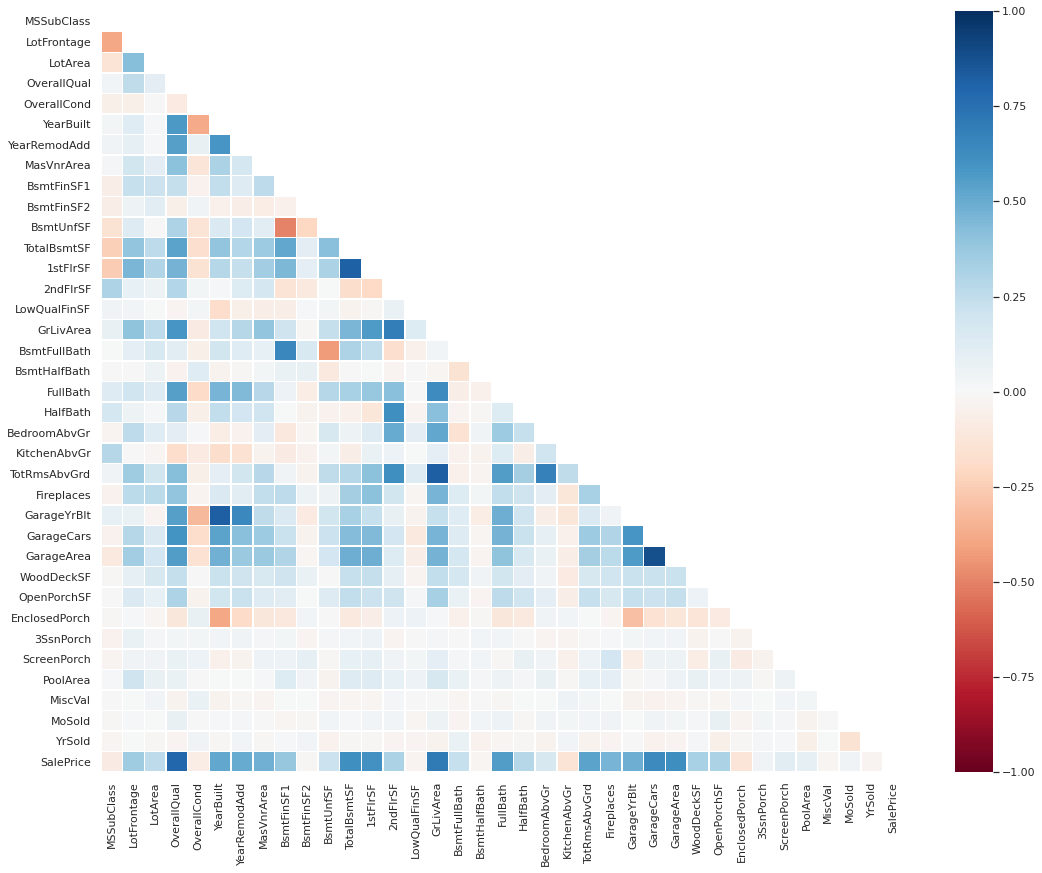

In [22]:
sns.set_theme(style="white")
plt.figure(figsize=(18,14))
corr = housing_df[numerical_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdBu', mask=mask, linewidths=.5, vmin=-1, vmax=1)

Few features are highly correlated (absolute value > 0.8) 

Taking further look below...

1. GarageYrBlt and YearBuilt (this make sense)
2. 1stFlrSF and TotalBsmtSF
3. TotRmsAbvGrd and GrLivArea
4. GarageArea and GarageCars

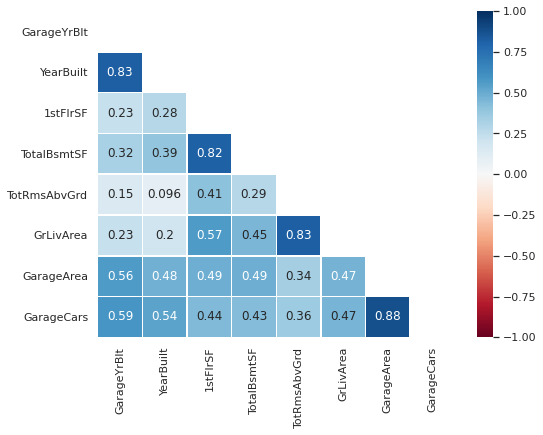

In [23]:
sns.set_theme(style="white")
plt.figure(figsize=(8,6))
corr = housing_df[['GarageYrBlt','YearBuilt','1stFlrSF','TotalBsmtSF','TotRmsAbvGrd','GrLivArea','GarageArea','GarageCars']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, cmap='RdBu', mask=mask, linewidths=.5, vmin=-1, vmax=1, annot=True)

Quick zoom into high correlations (absolute value more than 0.5) with saleprice. 

These are impt features we might need to keep track. 

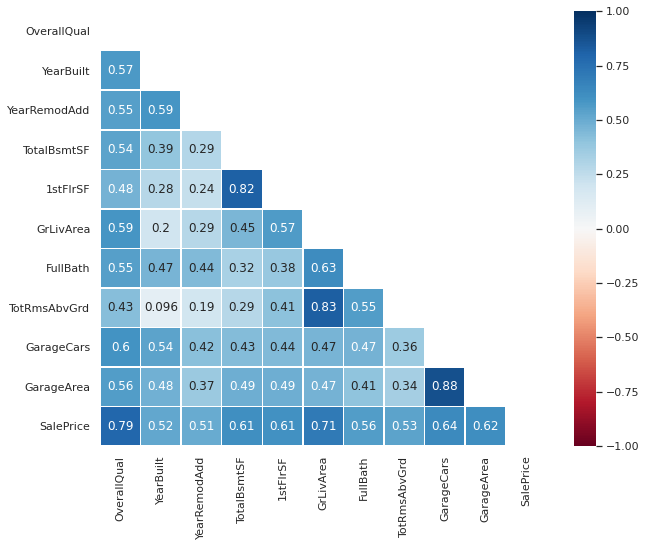

In [24]:
saleprice_corr_threshold = 0.5

corr = housing_df[numerical_cols].corr()
condition = corr['SalePrice'].abs() > saleprice_corr_threshold
high_correlation_with_saleprice = corr.loc[condition, condition]
sns.set_theme(style="white")
plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(high_correlation_with_saleprice, dtype=bool))
sns.heatmap(high_correlation_with_saleprice, cmap='RdBu', mask=mask, linewidths=.5, vmin=-1, vmax=1, annot=True)

From above, with regards to SalePrice:

1. OverallQual has strongest corr with SalePrice

2. GrLivArea is next, follow by GarageCars(and GarageArea)

3. TotalBsmtSF, 1stFlrSF follows. 

# Missing Values 

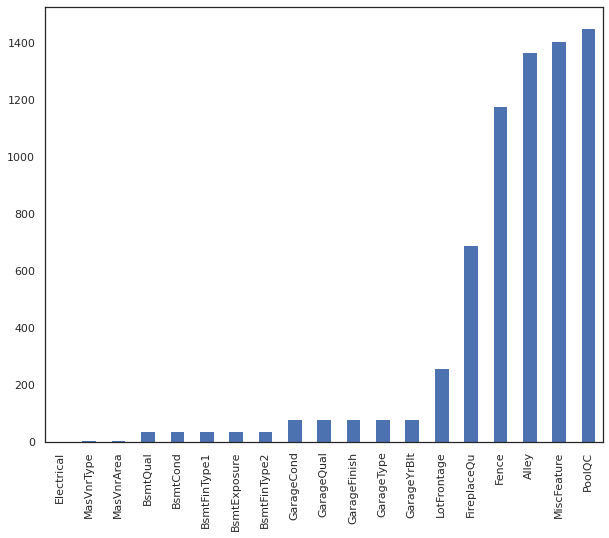

In [25]:
plt.figure(figsize=(10,8))
all_missing = housing_df.isnull().sum()
all_missing = all_missing[all_missing > 0]
all_missing.sort_values(inplace=True)
all_missing.plot.bar()

In [26]:
cols_with_missing = [col for col in housing_df.columns if housing_df[col].isnull().any()]
print('total features with missing data: ', len(cols_with_missing))

total features with missing data:  19


In [27]:
missing_val_percentage = housing_df.isna().sum()/len(housing_df)
missing_val_percentage = missing_val_percentage.sort_values(ascending=False)
missing_val_percentage[missing_val_percentage != 0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageCond      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageYrBlt     0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [28]:
missing_val_count_by_column = (housing_df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column!=0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

Total 19 features have missing data, 5 of them have close to/more than 50% missing data. 



1.   PoolQC          0.995205
2.   MiscFeature     0.963014
3.   Alley           0.937671
4.   Fence           0.807534
5.   FireplaceQu     0.472603


##Numerical features with missing values

In [29]:
num_cols_with_missing = [col for col in housing_df[numerical_cols].columns if housing_df[col].isnull().any()]
print("numerical featues with missing values: ", num_cols_with_missing)


numerical featues with missing values:  ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']


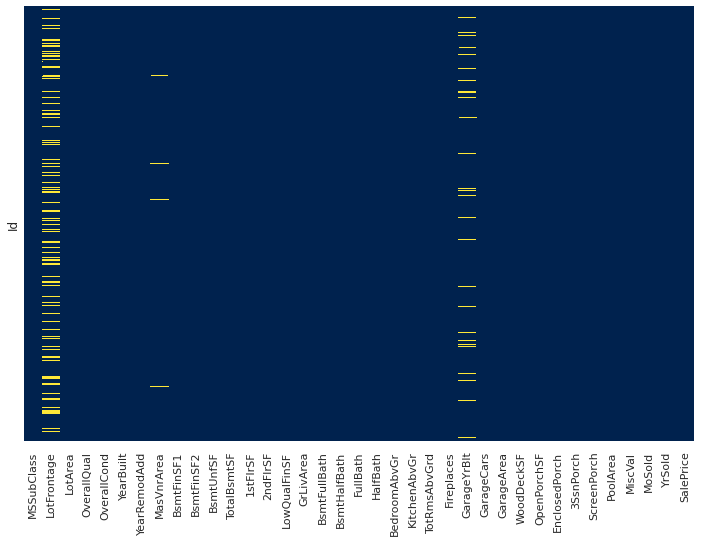

In [30]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df[numerical_cols].isnull(), yticklabels=False, cbar=False, cmap='cividis')

For numerical features, LotFrontage seems to have many missing features. Looks like these homes do not have a lot frontage to begin with, hence no data recorded. This is a genuine case of missing value. 

Same for GarageYrBlt, perhaps these homes do not have a garage to begin wtih. 

## Categorical Features with missing values

In [32]:
cat_cols_with_missing = [col for col in housing_df[object_cols].columns if housing_df[col].isnull().any()]

print("categorical featues with missing values: ", cat_cols_with_missing)

categorical featues with missing values:  ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


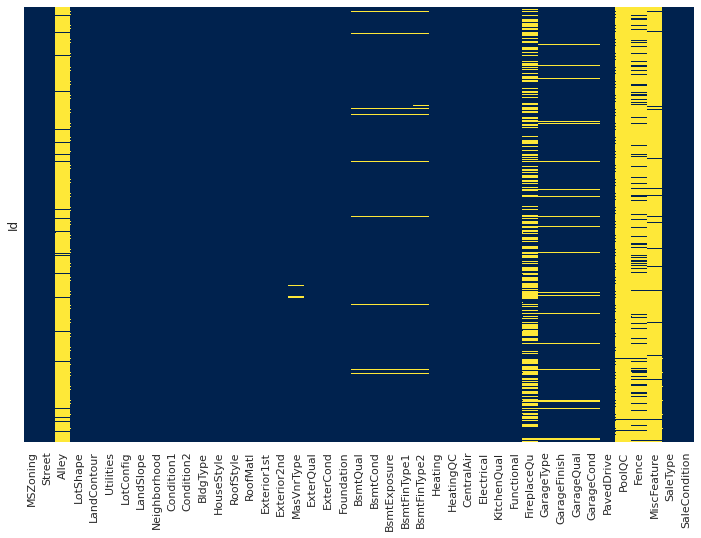

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df[object_cols].isnull(), yticklabels=False, cbar=False, cmap='cividis')

For categorical features, almost all records have missing values for Alley, Fence, PoolQC, FireplaceQu. 

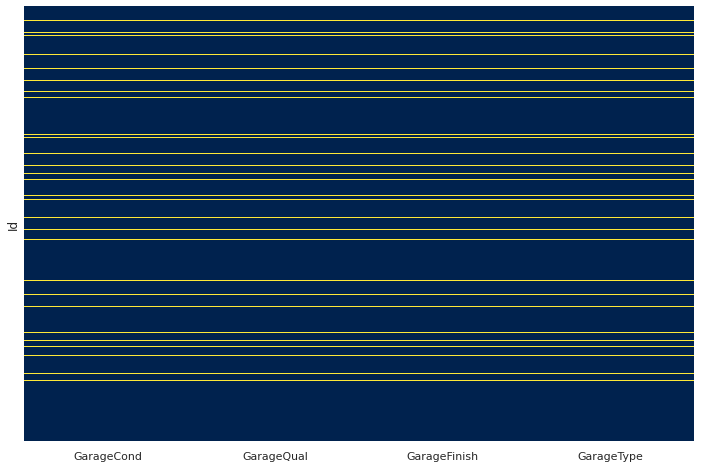

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df[['GarageCond','GarageQual','GarageFinish','GarageType']].isnull(), yticklabels=False, cbar=False, cmap='cividis')

For Garage related features, we can see that the missing values all come from the same home. A very good hint that these homes do not have a Garage, hence no data was recorded. 

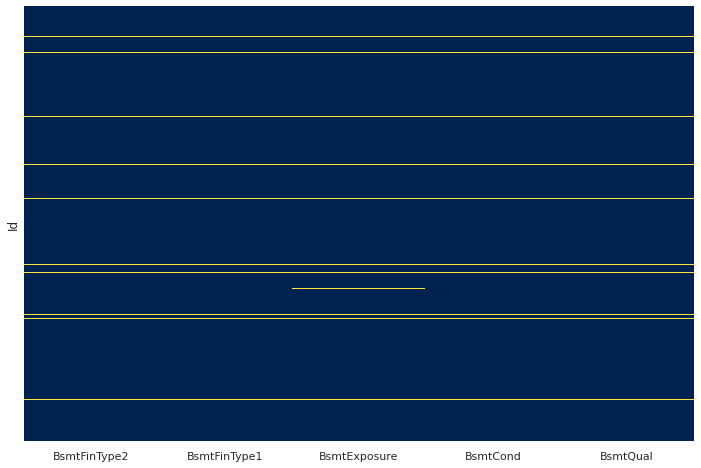

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(housing_df[['BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond','BsmtQual']].isnull(), yticklabels=False, cbar=False, cmap='cividis')

From above, we can see that all/most records have missing Basement related details are the same records. This could hint that these records do not have Basememt.

# SalePrice 

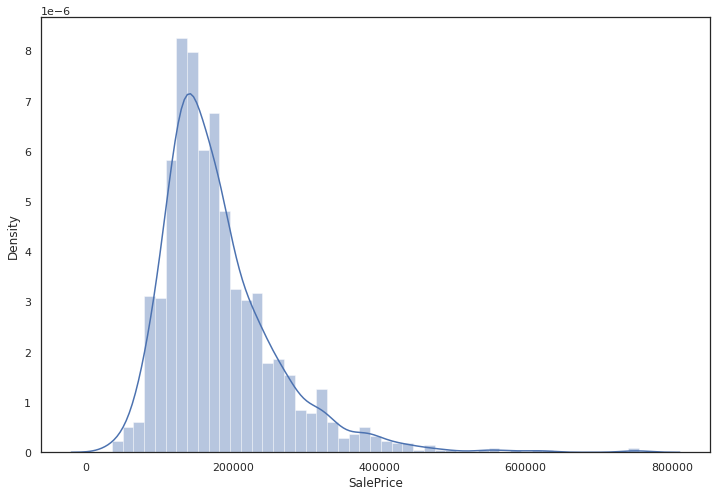

In [37]:
plt.figure(figsize=(12,8))
sns.distplot(housing_df['SalePrice'])

End of EDA. #chek